#### 1. Business Understanding
#### Objective

The retail company wants to understand customer shopping behavior to increase sales, improve satisfaction, and build loyalty.

#### Business Questions

* What drives customers to buy?

* Which customers are loyal?

* Which products perform well or poorly?

* How do discounts, reviews, seasons, and payment methods affect purchases?

* How do purchasing patterns differ across demographics and channels?

#### Business Success Criteria

* Better customer engagement strategies.

* Better-targeted promotions.

* Clear product and marketing optimization.

* Improved retention of high-value customers.

* Better understanding of online vs offline performance.

#### 2. Data Understanding

In [ ]:
# Load necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

c:\Users\USER\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [4]:
# Load the dataset
data = pd.read_csv('customer_shopping_behavior.csv')
data.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually


In [5]:
# Display basic information about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             3900 non-null   int64  
 1   Age                     3900 non-null   int64  
 2   Gender                  3900 non-null   object 
 3   Item Purchased          3900 non-null   object 
 4   Category                3900 non-null   object 
 5   Purchase Amount (USD)   3900 non-null   int64  
 6   Location                3900 non-null   object 
 7   Size                    3900 non-null   object 
 8   Color                   3900 non-null   object 
 9   Season                  3900 non-null   object 
 10  Review Rating           3863 non-null   float64
 11  Subscription Status     3900 non-null   object 
 12  Shipping Type           3900 non-null   object 
 13  Discount Applied        3900 non-null   object 
 14  Promo Code Used         3900 non-null   

In [6]:
# Show summary statistics
data.describe(include="all")

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
count,3900.000000,3900.000000,3900,3900,3900,3900.000000,3900,3900,3900,3900,3863.000000,3900,3900,3900,3900,3900.000000,3900,3900
unique,NaN,NaN,2,25,4,NaN,50,4,25,4,NaN,2,6,2,2,NaN,6,7
top,NaN,NaN,Male,Blouse,Clothing,NaN,Montana,M,Olive,Spring,NaN,No,Free Shipping,No,No,NaN,PayPal,Every 3 Months
freq,NaN,NaN,2652,171,1737,NaN,96,1755,177,999,NaN,2847,675,2223,2223,NaN,677,584
mean,1950.500000,44.068462,NaN,NaN,NaN,59.764359,NaN,NaN,NaN,NaN,3.750065,NaN,NaN,NaN,NaN,25.351538,NaN,NaN
std,1125.977353,15.207589,NaN,NaN,NaN,23.685392,NaN,NaN,NaN,NaN,0.716983,NaN,NaN,NaN,NaN,14.447125,NaN,NaN
min,1.000000,18.000000,NaN,NaN,NaN,20.000000,NaN,NaN,NaN,NaN,2.500000,NaN,NaN,NaN,NaN,1.000000,NaN,NaN
25%,975.750000,31.000000,NaN,NaN,NaN,39.000000,NaN,NaN,NaN,NaN,3.100000,NaN,NaN,NaN,NaN,13.000000,NaN,NaN
50%,1950.500000,44.000000,NaN,NaN,NaN,60.000000,NaN,NaN,NaN,NaN,3.800000,NaN,NaN,NaN,NaN,25.000000,NaN,NaN
75%,2925.250000,57.000000,NaN,NaN,NaN,81.000000,NaN,NaN,NaN,NaN,4.400000,NaN,NaN,NaN,NaN,38.000000,NaN,NaN


In [7]:
# Check for missing values
null_counts = data.isnull().sum()
print(null_counts)

Customer ID                0
Age                        0
Gender                     0
Item Purchased             0
Category                   0
Purchase Amount (USD)      0
Location                   0
Size                       0
Color                      0
Season                     0
Review Rating             37
Subscription Status        0
Shipping Type              0
Discount Applied           0
Promo Code Used            0
Previous Purchases         0
Payment Method             0
Frequency of Purchases     0
dtype: int64


#### Exploratory Data Analysis (EDA)

#### Use medians for numerical columns and mode for categorical columns to fill missing values

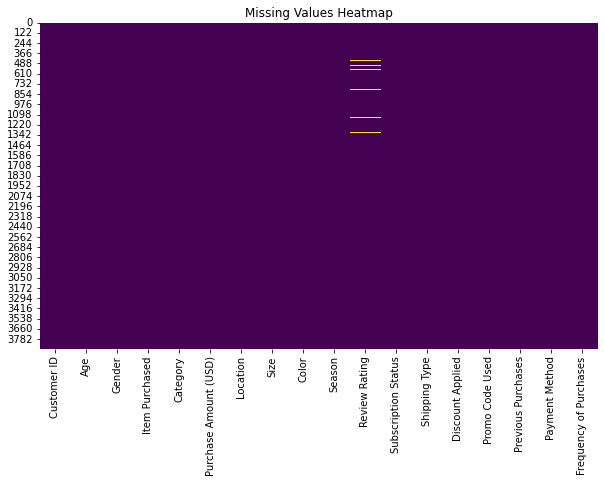

In [8]:
# Visualize missing values
plt.figure(figsize=(10,6))
sns.heatmap(data.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

In [9]:
# Imputing missing values in Review Rating column with the median rating of the product category
data['Review Rating'] = data.groupby('Category')['Review Rating'].transform(
    lambda x: x.fillna(x.median())
)

In [10]:
# check for null values again
data.isnull().sum()

Customer ID               0
Age                       0
Gender                    0
Item Purchased            0
Category                  0
Purchase Amount (USD)     0
Location                  0
Size                      0
Color                     0
Season                    0
Review Rating             0
Subscription Status       0
Shipping Type             0
Discount Applied          0
Promo Code Used           0
Previous Purchases        0
Payment Method            0
Frequency of Purchases    0
dtype: int64

In [11]:
# clean the columns names
data.columns = data.columns.str.lower()
data.columns = data.columns.str.replace(' ', '_')
data = data.rename(columns={'purchase_amount_(usd)': 'purchase_amount'})
data.head()


,customer_id,age,gender,item_purchased,category,purchase_amount,location,size,color,season,review_rating,subscription_status,shipping_type,discount_applied,promo_code_used,previous_purchases,payment_method,frequency_of_purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually


In [12]:
# Check the cleaned column names
data.columns

Index(['customer_id', 'age', 'gender', 'item_purchased', 'category',
       'purchase_amount', 'location', 'size', 'color', 'season',
       'review_rating', 'subscription_status', 'shipping_type',
       'discount_applied', 'promo_code_used', 'previous_purchases',
       'payment_method', 'frequency_of_purchases'],
      dtype='object')

In [13]:
# create a column age-group
labels = ['Young-Adults', 'Adults', 'Middle-Aged', 'Seniors']
bins = [0, 24, 44, 64, np.inf]

data['age_group'] = pd.cut(data['age'], bins=bins, labels=labels, right=True, include_lowest=True)

# display counts in the specified order
data['age_group'].value_counts().reindex(labels).fillna(0).astype(int)
data.head()
# d --- IGNORE ---


,customer_id,age,gender,item_purchased,category,purchase_amount,location,size,color,season,review_rating,subscription_status,shipping_type,discount_applied,promo_code_used,previous_purchases,payment_method,frequency_of_purchases,age_group
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly,Middle-Aged
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly,Young-Adults
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly,Middle-Aged
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly,Young-Adults
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually,Middle-Aged


In [14]:
# show the first rows of the two columns
data[['age_group', 'age']].head()

,age_group,age
0,Middle-Aged,55
1,Young-Adults,19
2,Middle-Aged,50
3,Young-Adults,21
4,Middle-Aged,45


In [15]:

# mapping frequency of purchases to numerical days
freq_map = {
    'daily': 1,
    'weekly': 7,
    'fortnightly': 14,
    'bi-weekly': 14,
    'monthly': 30,
    'quarterly': 90,
    'annually': 365
}

# normalize text and map to days
data['purchase_frequency_days'] = (
    data['frequency_of_purchases']
    .str.lower()
    .str.strip()
    .str.replace(r'[^a-z\-]', '', regex=True)
    .map(freq_map)
)

# show how many were unmapped and fill unmapped with median (optional)
unmapped = data['purchase_frequency_days'].isna().sum()
print(f"Unmapped rows: {unmapped}")
if data['purchase_frequency_days'].notna().any():
    data['purchase_frequency_days'] = data['purchase_frequency_days'].fillna(int(data['purchase_frequency_days'].median()))

data[['frequency_of_purchases', 'purchase_frequency_days']].head(10)


Unmapped rows: 584


,frequency_of_purchases,purchase_frequency_days
0,Fortnightly,14.0
1,Fortnightly,14.0
2,Weekly,7.0
3,Weekly,7.0
4,Annually,365.0
5,Weekly,7.0
6,Quarterly,90.0
7,Weekly,7.0
8,Annually,365.0
9,Quarterly,90.0


In [16]:
# check whether 'discount_applied' equals 'promo_code_used' for all rows
all_equal = (data['discount_applied'] == data['promo_code_used']).all()
print("All equal:", all_equal)

# if any mismatches, show count and a few examples
if not all_equal:
    mismatches = data[data['discount_applied'] != data['promo_code_used']]
    print("Number of mismatches:", len(mismatches))
    mismatches[['customer_id', 'discount_applied', 'promo_code_used']].head(10)

All equal: True


In [17]:
# since they are redundant, drop one of the columns
data.drop(columns=['promo_code_used'], inplace=True)
data.head()

,customer_id,age,gender,item_purchased,category,purchase_amount,location,size,color,season,review_rating,subscription_status,shipping_type,discount_applied,previous_purchases,payment_method,frequency_of_purchases,age_group,purchase_frequency_days
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,14,Venmo,Fortnightly,Middle-Aged,14.0
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,2,Cash,Fortnightly,Young-Adults,14.0
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,23,Credit Card,Weekly,Middle-Aged,7.0
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,49,PayPal,Weekly,Young-Adults,7.0
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,31,PayPal,Annually,Middle-Aged,365.0


In [18]:
# Save the cleaned dataset
data.to_csv('cleaned_customer_shopping_behavior.csv', index=False)

## Mysql Connection

In [ ]:
# To install required packages, run:
%pip install pymysql sqlalchemy


[notice] A new release of pip is available: 24.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [29]:
%pip install python-dotenv


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [28]:
# Use IPython magic to install the pymysql package in this Jupyter environment
%pip install pymysql


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
from sqlalchemy import create_engine

# MySQL connection
username = "root"
password = "########"
host = "localhost"
port = "3306"
database = "customer_behavior"

engine = create_engine(f"mysql+pymysql://{username}:{password}@{host}:{port}/{database}")

# Write DataFrame to MySQL
table_name = "customer"   
data.to_sql(table_name, engine, if_exists="replace", index=False)

# Read back sample
pd.read_sql("SELECT * FROM customer LIMIT 5;", engine)


,customer_id,age,gender,item_purchased,category,purchase_amount,location,size,color,season,review_rating,subscription_status,shipping_type,discount_applied,previous_purchases,payment_method,frequency_of_purchases,age_group,purchase_frequency_days
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,14,Venmo,Fortnightly,Middle-Aged,14.0
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,2,Cash,Fortnightly,Young-Adults,14.0
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,23,Credit Card,Weekly,Middle-Aged,7.0
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,49,PayPal,Weekly,Young-Adults,7.0
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,31,PayPal,Annually,Middle-Aged,365.0
